In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [38]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df = df.drop(columns="MentHlth") # poi eliminare proprio dal dataset 
df = df.drop(columns="PhysHlth") # poi eliminare proprio dal dataset 
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
print(df.shape)
df.head(10)

(253680, 20)


,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,8.0,4.0,3.0


In [39]:
df.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [40]:
unique_series = df.apply(lambda x: x.unique())
print(unique_series)
print("")
print("="*40)
print("")
print(f"So the columns that we have to discretize are: {df.columns[4]}, {df.columns[15]}, {df.columns[16]}, {df.columns[19]}, {df.columns[19]}")

Diabetes                                                  [0.0, 2.0, 1.0]
HighBP                                                         [1.0, 0.0]
HighChol                                                       [1.0, 0.0]
CholCheck                                                      [1.0, 0.0]
BMI                     [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26....
Smoker                                                         [1.0, 0.0]
Stroke                                                         [0.0, 1.0]
HeartDiseaseorAttack                                           [0.0, 1.0]
PhysActivity                                                   [0.0, 1.0]
Fruits                                                         [0.0, 1.0]
Veggies                                                        [1.0, 0.0]
HvyAlcoholConsump                                              [0.0, 1.0]
AnyHealthcare                                                  [1.0, 0.0]
NoDocbcCost                           

In [41]:
print(f"Range of values of BMI: {df['BMI'].min()} - {df['BMI'].max()}")
print(f"Range of values of Age: {df['Age'].min()} - {df['Age'].max()}")
print(f"Range of values of Income: {df['Income'].min()} - {df['Income'].max()}")

Range of values of BMI: 12.0 - 98.0
Range of values of Age: 1.0 - 13.0
Range of values of Income: 1.0 - 8.0


In [42]:
# BMI :
#   - 12<=BMI<=17: underweight = 0
#   - 18<=BMI<=27: normal weight = 1
#   - 28<=BMI<=44: overweight = 2
#   - 45<=BMI: obese = 3

bins = [12, 17, 27, 44, 98]
labels = [0, 1, 2, 3]

df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=True).astype(int)

# Age
#   - 1<=Age<=4: 0 and means between 18 and 35
#   - 5<=Age<=9: 1 and means beatwee 36 and 64
#   - 10<=Age<=17: 2 and means between 65 and 80
#   - 18=Age: 3 and means 81 or older

bins = [1, 4, 9, 17, 18]
labels = [0, 1, 2, 3]

df["Age"] = pd.cut(df["Age"], bins = bins, labels = labels, include_lowest= True).astype(int)



In [43]:
df["Age"].unique()

array([1, 2, 0])

In [44]:
COLUMN_NAMES = ["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity",
                "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth",
                "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]

TARGET = "Diabetes"

Now we have to create the bayesian netowork, we can use the Hill Climbing technique. 
The Hill Climbing algorithm is a local search technique for optimization, often used to discover the structure of a Bayesian network, based on an iterative approach. The algorithm starts from a random solution and progressively improves it by exploring its neighbors (in terms of modifications to the network structure), moving towards those that lead to a better score, in our case we use the Bic Score.

In [45]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BicScore

The fundamental idea is that this score measures two things:

Goodness of fit: How well the network represents the observed data, we compute the Likelihood of the model by multipling the conditional probability for every observation in the data. Higher is this value, better our newtork explains the data

Penalty for complexity: A more complex network with too many parameters may fit the data too well (overfitting). The score aims to find a balance, so in this case it is going to penalize complex network.

In [46]:
# fnction to compute the score of the network
def calculate_score(model, data):
    bic = BicScore(data)
    return bic.score(model)

In [47]:
""""import matplotlib.pyplot as plt

def plot_bayesian_network(model):
    # Crea un grafo diretto usando NetworkX
    G = nx.DiGraph()
    
    # Aggiungi i nodi (variabili) al grafo
    G.add_nodes_from(model.nodes())
    
    # Aggiungi gli archi (dipendenze tra variabili) al grafo
    G.add_edges_from(model.edges())
    
    # Disegna il grafo usando matplotlib
    plt.figure(figsize=(10, 10))  # Puoi regolare la dimensione della figura
    pos = nx.spring_layout(G)  # Posizionamento automatico dei nodi (puoi modificarlo)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)

    # Mostra il grafo
    plt.title("Bayesian Network")
    plt.show()"""""

'"import matplotlib.pyplot as plt\n\ndef plot_bayesian_network(model):\n    # Crea un grafo diretto usando NetworkX\n    G = nx.DiGraph()\n    \n    # Aggiungi i nodi (variabili) al grafo\n    G.add_nodes_from(model.nodes())\n    \n    # Aggiungi gli archi (dipendenze tra variabili) al grafo\n    G.add_edges_from(model.edges())\n    \n    # Disegna il grafo usando matplotlib\n    plt.figure(figsize=(10, 10))  # Puoi regolare la dimensione della figura\n    pos = nx.spring_layout(G)  # Posizionamento automatico dei nodi (puoi modificarlo)\n    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=\'skyblue\', font_size=12, font_weight=\'bold\', arrows=True)\n\n    # Mostra il grafo\n    plt.title("Bayesian Network")\n    plt.show()'

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_bayesian_network(model):
    # Ottieni il grafo come NetworkX DiGraph
    nx_graph = nx.DiGraph(model.edges())

    # Usa il layout per migliorare la disposizione
    pos = nx.spring_layout(nx_graph, k=1.5, seed=42)  # k regola la distanza tra i nodi

    # Disegna il grafo
    plt.figure(figsize=(14, 14))  # Aumenta le dimensioni
    nx.draw(nx_graph, pos, with_labels=True, node_color="skyblue",
            node_size=2000, font_size=8, edge_color="black", font_weight="bold",
            arrowsize=15, linewidths=2)

    plt.title("Bayesian Network", fontsize=14)
    plt.show()


We need a method to comput the neighbors of our actual network, we create these neighbors models by adding arcs, removing arcs or changing their direction 

In [49]:
import networkx as nx

def get_neighbors(model):
    neighbors = []
    nodes = list(model.nodes())

    #adding arcs
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            if not model.has_edge(nodes[i], nodes[j]):
                new_model = model.copy()
                new_model.add_edge(nodes[i], nodes[j])
                if nx.is_directed_acyclic_graph(new_model):  # Controllo che sia DAG
                    neighbors.append(new_model)

                
   # Genera vicini rimuovendo archi
    for edge in model.edges():
        new_model = model.copy()
        new_model.remove_edge(edge[0], edge[1])
        neighbors.append(new_model)

    # Generare vicini invertendo la direzione degli archi
    for edge in model.edges():
        new_model = model.copy()
        new_model.remove_edge(edge[0], edge[1])  
        
        # Verifica se l'inversione crea un ciclo (controlla la direzione invertita)
        if not nx.has_path(new_model, edge[1], edge[0]) and not nx.has_path(new_model, edge[0], edge[1]):
            new_model.add_edge(edge[1], edge[0])  # Aggiungi l'arco invertito
            if nx.is_directed_acyclic_graph(new_model):  # Verifica che sia ancora un DAG
                neighbors.append(new_model)

    return neighbors

In [50]:
def hill_climbing(data, max_iter = 100, tolerance=0.01):
    model = BayesianNetwork()
    
    #creating a random network (random arcs between nodes)
    nodes = data.columns.tolist()
    model.add_nodes_from(nodes)
    for i in range(len(nodes)):
        for j in range(i +1, len(nodes)):
            if np.random.rand() > 0.5:
                model.add_edge(nodes[i], nodes[j])

    #computing the start score of the random network
    best_score = calculate_score(model, data)
    best_model = model.copy()
    # Mostra la struttura trovata (gli archi)
    print("Random initial network:")
    print(best_model.edges())
    print(best_score)
    plot_bayesian_network(best_model)


    #starting iteration
    for _ in range(max_iter):
        neighbors = get_neighbors(model)

        #we try to find the best score from the neighbors
        best_neighbor_score = best_score
        best_neighbor = None
        for neighbor in neighbors:
            score = calculate_score(neighbor, data)
            if score > best_neighbor_score:
                best_neighbor_score = score
                best_neighbor = neighbor

        #if we find a better neighbor than our model we update our best model and score
        if best_neighbor is not None:
            best_score = best_neighbor_score
            best_model = best_neighbor         
        else:
            break
        
    return best_model,best_score        

In [51]:
unique_series = df.apply(lambda x: x.unique())
print(unique_series)
print("")
print("="*40)
print("")
df = df.drop(columns=["Income", "Education", "GenHlth", "AnyHealthcare", "NoDocbcCost", "Fruits", "Veggies"])
df.columns

Diabetes                                         [0.0, 2.0, 1.0]
HighBP                                                [1.0, 0.0]
HighChol                                              [1.0, 0.0]
CholCheck                                             [1.0, 0.0]
BMI                                                 [2, 1, 3, 0]
Smoker                                                [1.0, 0.0]
Stroke                                                [0.0, 1.0]
HeartDiseaseorAttack                                  [0.0, 1.0]
PhysActivity                                          [0.0, 1.0]
Fruits                                                [0.0, 1.0]
Veggies                                               [1.0, 0.0]
HvyAlcoholConsump                                     [0.0, 1.0]
AnyHealthcare                                         [1.0, 0.0]
NoDocbcCost                                           [0.0, 1.0]
GenHlth                                [5.0, 3.0, 2.0, 4.0, 1.0]
DiffWalk                 

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [52]:
"""best_model, best_score = hill_climbing(df)
print("Struttura della rete appresa:")
print(best_model.edges())"""

'best_model, best_score = hill_climbing(df)\nprint("Struttura della rete appresa:")\nprint(best_model.edges())'

In [53]:
"""# Esegui la funzione di plotting
plot_bayesian_network(best_model)
print(best_score)"""

'# Esegui la funzione di plotting\nplot_bayesian_network(best_model)\nprint(best_score)'

Random initial network:
[('Diabetes', 'HighBP'), ('Diabetes', 'HighChol'), ('Diabetes', 'CholCheck'), ('Diabetes', 'BMI'), ('Diabetes', 'Smoker'), ('Diabetes', 'Stroke'), ('Diabetes', 'PhysActivity'), ('Diabetes', 'DiffWalk'), ('Diabetes', 'Sex'), ('HighBP', 'HighChol'), ('HighBP', 'Smoker'), ('HighBP', 'Stroke'), ('HighBP', 'PhysActivity'), ('HighBP', 'HvyAlcoholConsump'), ('HighChol', 'Smoker'), ('HighChol', 'Stroke'), ('HighChol', 'HeartDiseaseorAttack'), ('HighChol', 'PhysActivity'), ('HighChol', 'DiffWalk'), ('HighChol', 'Sex'), ('CholCheck', 'BMI'), ('CholCheck', 'Stroke'), ('CholCheck', 'HeartDiseaseorAttack'), ('CholCheck', 'HvyAlcoholConsump'), ('CholCheck', 'DiffWalk'), ('CholCheck', 'Sex'), ('BMI', 'Smoker'), ('BMI', 'HeartDiseaseorAttack'), ('BMI', 'PhysActivity'), ('BMI', 'HvyAlcoholConsump'), ('BMI', 'DiffWalk'), ('BMI', 'Age'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'PhysActivity'), ('Smoker', 'Sex'), ('Smoker', 'Age'), ('Stroke', 'HeartDiseaseorAttack'), ('Strok

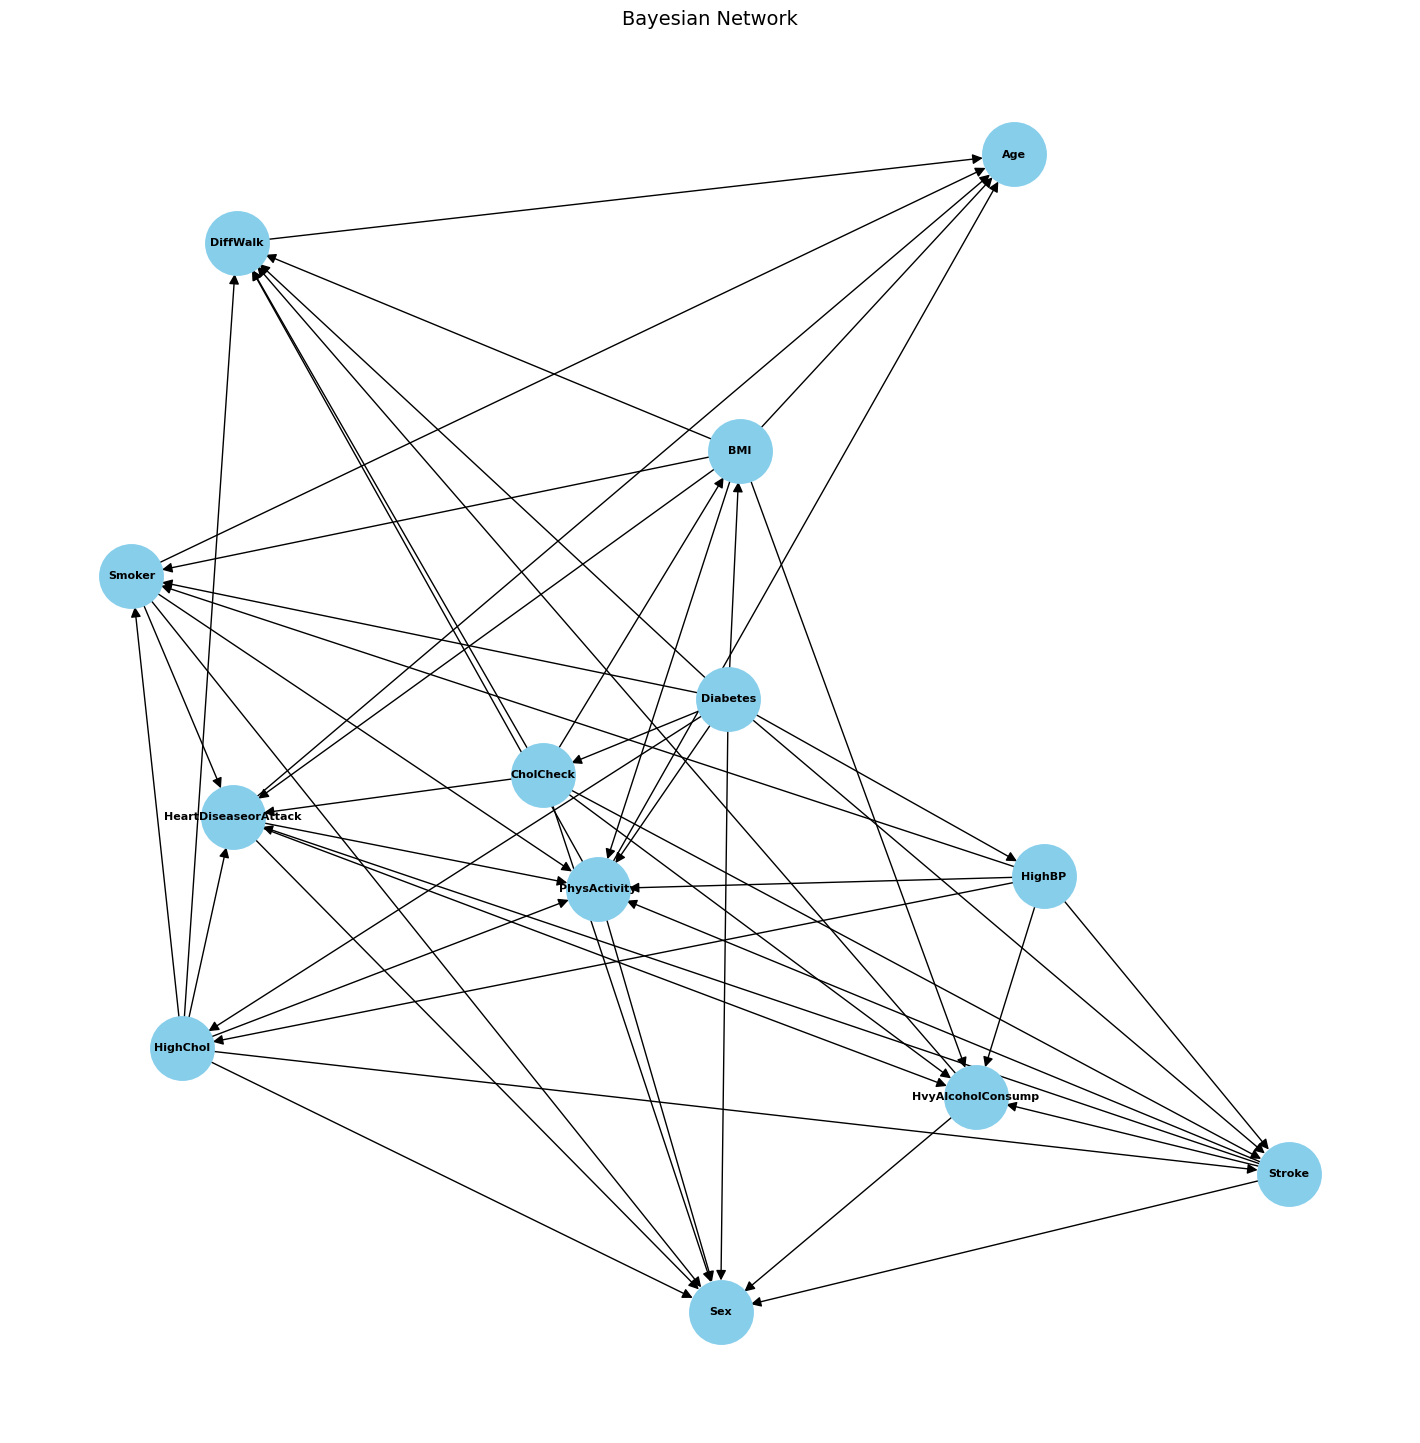

In [54]:
#creating a random network (random arcs between nodes)
model = BayesianNetwork()
nodes = list(model.nodes())
nodes = df.columns.tolist()
model.add_nodes_from(nodes)
for i in range(len(nodes)):
    for j in range(i +1, len(nodes)):
        if np.random.rand() > 0.5:
            model.add_edge(nodes[i], nodes[j])

#computing the start score of the random network
best_score = calculate_score(model, df)
best_model = model.copy()
# Mostra la struttura trovata (gli archi)
print("Random initial network:")
print(best_model.edges())
print(best_score)
plot_bayesian_network(best_model)

  0%|          | 0/1000000 [00:00<?, ?it/s]

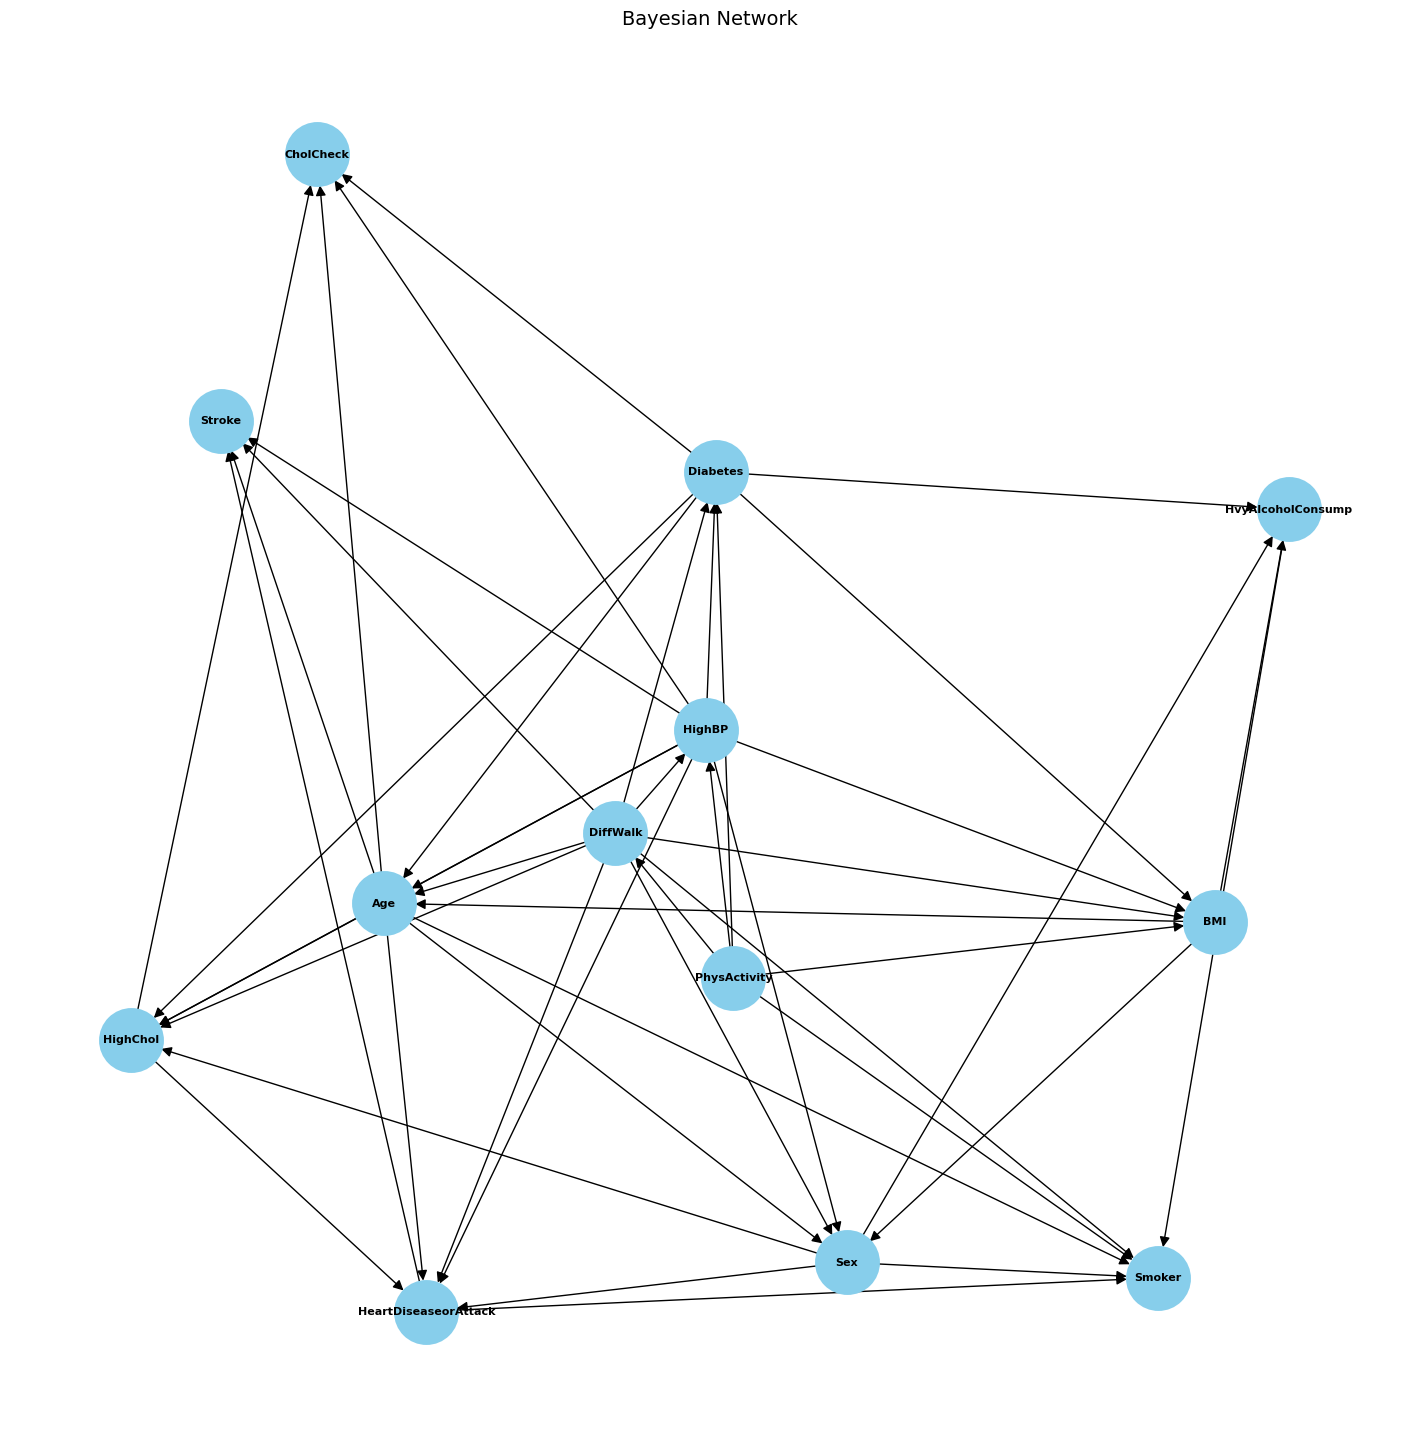

-1642505.6659517651


In [55]:
from pgmpy.estimators import HillClimbSearch, BicScore

# Esegui Hill Climbing per trovare la miglior struttura
hc = HillClimbSearch(df)
#scoring_method = BicScore(df)
best_model = hc.estimate(scoring_method="bicscore" )
#best_score = scoring_method.score(best_model)
#print("Score della rete trovata:", best_score)
# Stampa la struttura trovata
plot_bayesian_network(best_model)
bic_score = BicScore(df).score(best_model)
print(bic_score)

In [56]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'DiffWalk', 'Sex', 'Age'],
      dtype='object')

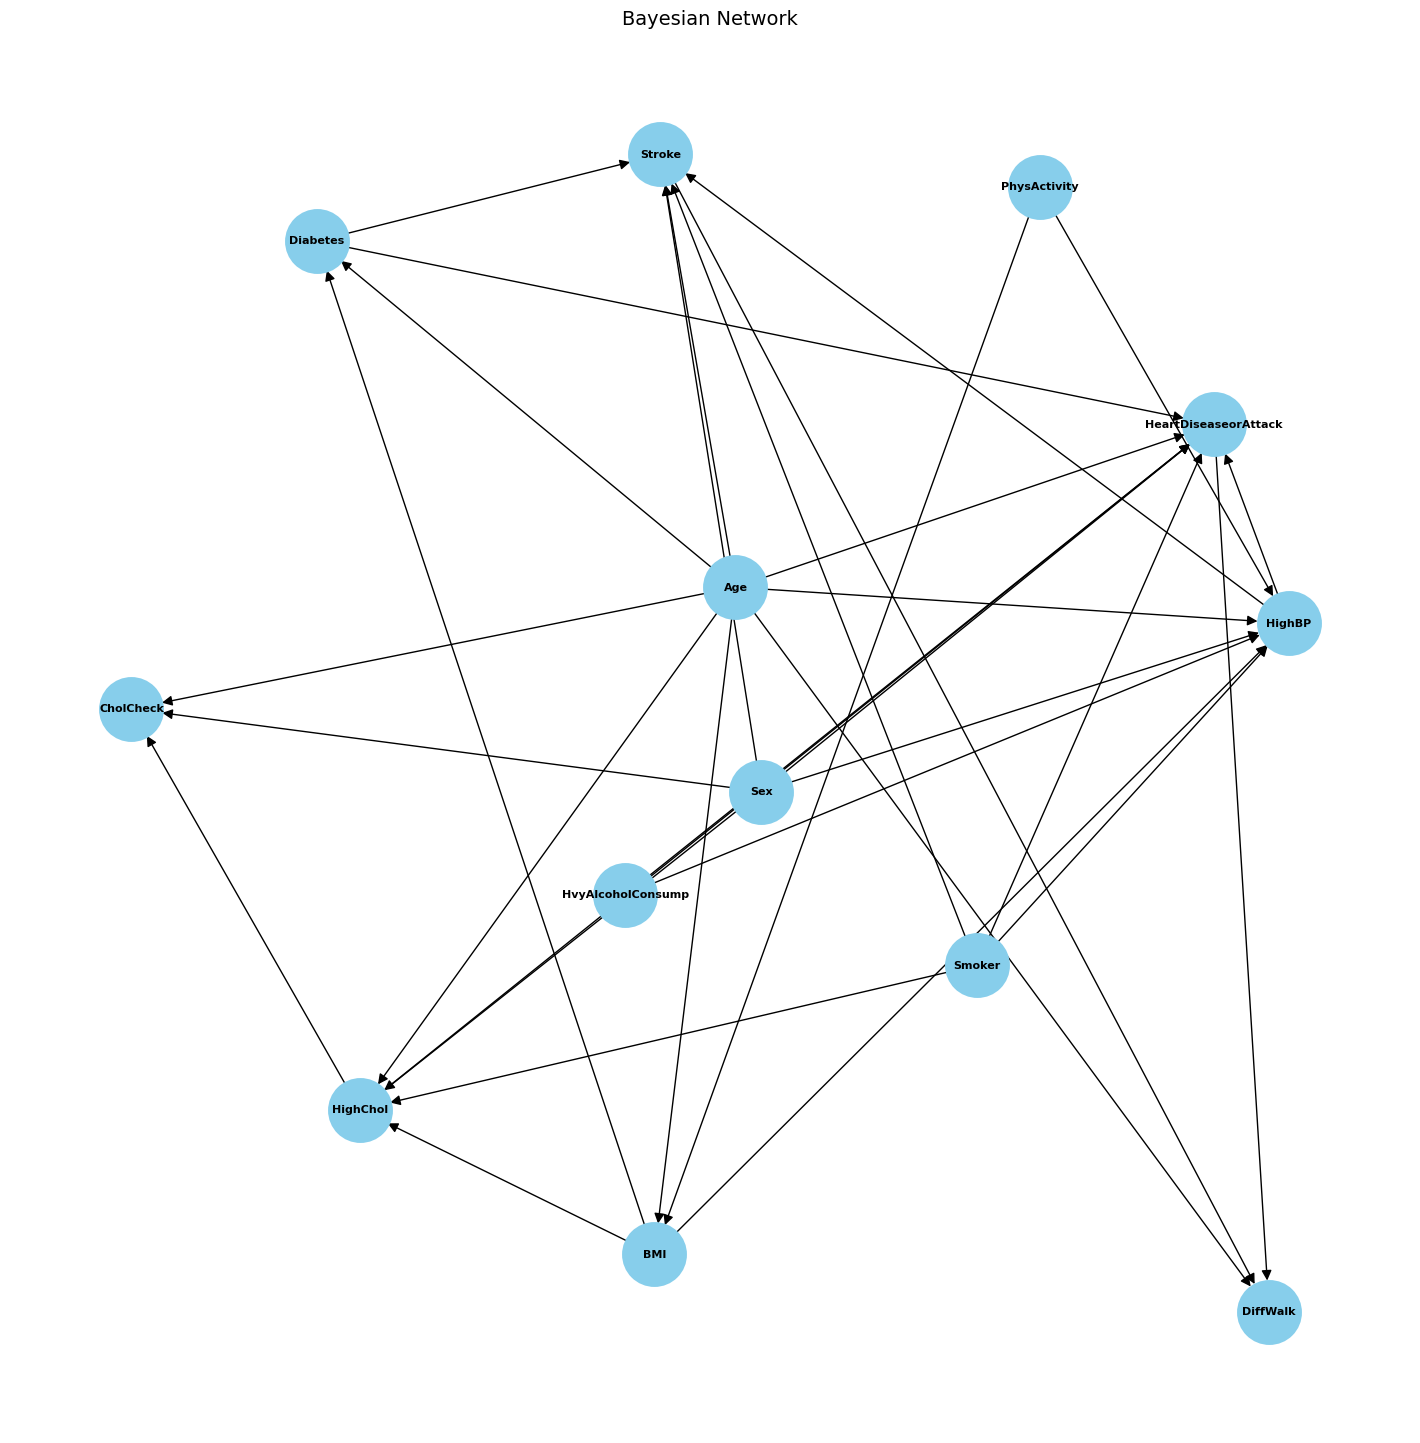

-1678835.4939727625


In [57]:
from pgmpy.models import BayesianModel
ourbayes = BayesianModel([
    ('Age', 'HighBP'),
    ('Age', 'HighChol'),
    ('Age', 'Diabetes'),
    ('Age', 'HeartDiseaseorAttack'),
    ('Age', 'Stroke'),
    ('Age', 'DiffWalk'),
    ('Age', 'BMI'),
    ('Age', 'CholCheck'),
    ('Sex', 'HighBP'),
    ('Sex', 'HighChol'),
    ('Sex', 'HeartDiseaseorAttack'),
    ('Sex', 'Stroke'),
    ('Sex', 'CholCheck'),
    ('Smoker', 'HighBP'),
    ('Smoker', 'HighChol'),
    ('Smoker', 'HeartDiseaseorAttack'),
    ('Smoker', 'Stroke'),
    ('HvyAlcoholConsump', 'HighBP'),
    ('HvyAlcoholConsump', 'HeartDiseaseorAttack'),
    ('PhysActivity', 'BMI'),
    ('PhysActivity', 'HighBP'),
    ('BMI', 'Diabetes'),
    ('BMI', 'HighBP'),
    ('BMI', 'HighChol'),
    ('HighBP', 'Stroke'),
    ('HighBP', 'HeartDiseaseorAttack'),
    ('HighChol', 'HeartDiseaseorAttack'),
    ('Diabetes', 'HeartDiseaseorAttack'),
    ('Diabetes', 'Stroke'),
    ('HeartDiseaseorAttack', 'DiffWalk'),
    ('Stroke', 'DiffWalk'),
    ('HighChol','CholCheck')
])

plot_bayesian_network(ourbayes)
bic_score = BicScore(df).score(ourbayes)
print(bic_score)

In [77]:
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

# Crea il modello bayesiano usando la struttura appresa
from pgmpy.models import BayesianNetwork

# Crea il modello DAG
model = BayesianNetwork(best_model.edges())
print(type(model))
# Stima le CPT con Maximum Likelihood
model.fit(df, estimator=MaximumLikelihoodEstimator)
"""
# Stampa le tabelle di probabilità condizionale (CPT)
for cpd in model.get_cpds():
    print(f"CPT per {cpd.variable}:")
    print(cpd)
    print("\n" + "="*50 + "\n")  # Separatore per leggibilità"
    """

<class 'pgmpy.models.BayesianNetwork.BayesianNetwork'>


'\n# Stampa le tabelle di probabilità condizionale (CPT)\nfor cpd in model.get_cpds():\n    print(f"CPT per {cpd.variable}:")\n    print(cpd)\n    print("\n" + "="*50 + "\n")  # Separatore per leggibilità"\n    '

In [78]:
# Crea il modello DAG
ourmodel = BayesianNetwork(ourbayes)

# Stima le CPT con Maximum Likelihood
ourmodel.fit(df, estimator=MaximumLikelihoodEstimator)